# Matplotlib: Box Plots

Show Distribution of numerical values

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Simple Examples

### 1. Build the subset of data for plotting

In [2]:
# Only get data analyst jobs from the United States
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US['salary_year_avg'].sample(10)

457084    107500.0
641044    127500.0
551966     65000.0
716454     70000.0
166863    150000.0
388305     91000.0
474849     63549.5
612059     72500.0
722393     88602.5
620193    125000.0
Name: salary_year_avg, dtype: float64

### 2. Plot the Box Plot

<Axes: >

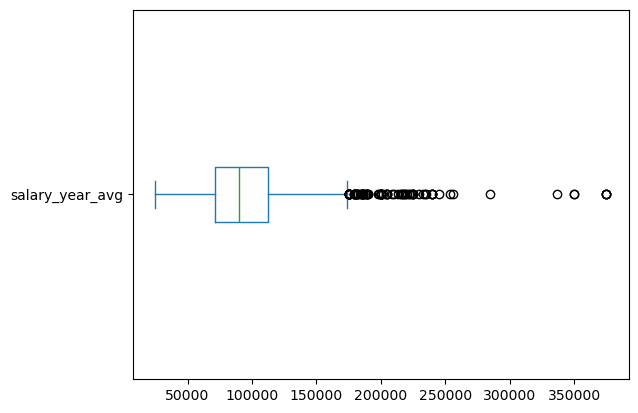

In [3]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f22b72d6390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f22b72d7ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f22b72d5790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f22b72dd1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f22b72ddcd0>],
 'means': []}

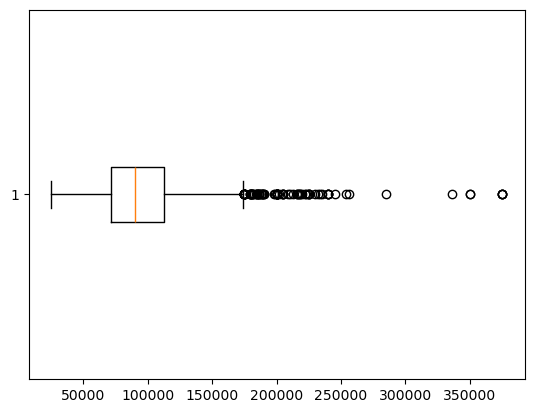

In [4]:
# Matplotlib basic boxplot
plt.boxplot(df_DA_US['salary_year_avg'], vert=False)

## Plotting Multiple Series Examples

/tmp/ipykernel_51171/3538530834.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


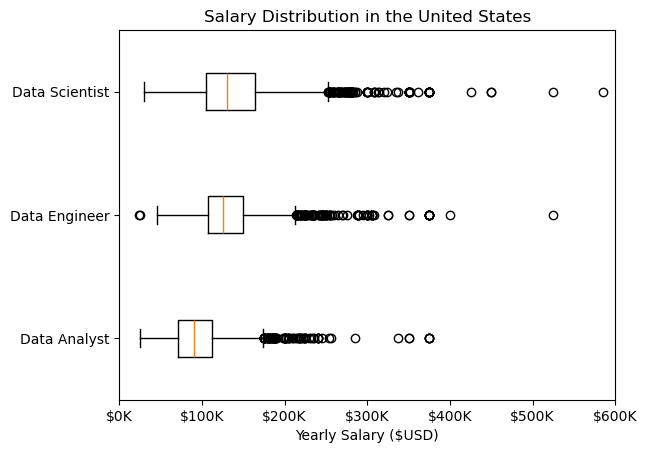

In [5]:
# Labels and filter for the different job titles for our plot
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Only get data analyst jobs from the United States
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

# Use List comprehension to get lists of jobs for each job title to plot
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K' ))

# 1,000K outlier exists but limiting scope for better insights
plt.xlim(0, 600_000)
plt.show()

# Problems

In [6]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

 ## Data Scientist Hourly Salary Box Plot (2.18.1) - Problem

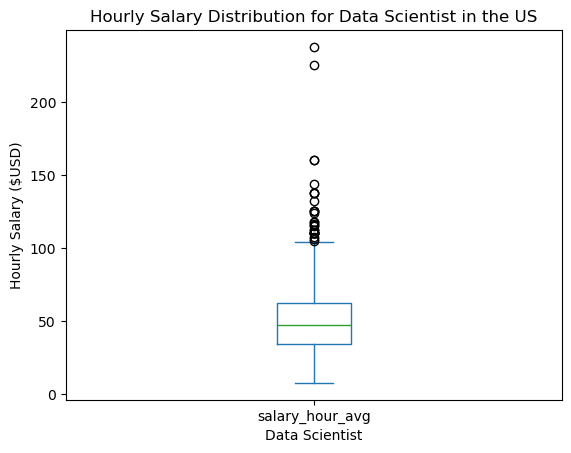

In [11]:
# Distribution of Salary Hourly Average for Data Scientist in United States
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_DS_US = df_DS_US.dropna(subset=['salary_hour_avg'])

df_DS_US['salary_hour_avg'].plot(kind='box')

plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()

## Comparison of Hourly Salaries for Data Analyst (2.18.2) - Problem

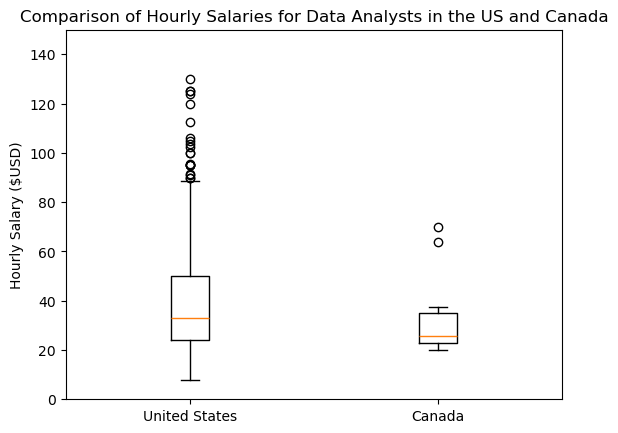

In [21]:
# Distribution of Salary Hour Average for Data Analyst in US and Canada
countries = ['United States', 'Canada']

df_DA_US_CA = df[(df['job_country'].isin(countries))& (df['job_title_short'] == 'Data Analyst')].copy()

df_DA_US_CA = df_DA_US_CA.dropna(subset=['salary_hour_avg'])

country_job_list = [df_DA_US_CA[df_DA_US_CA['job_country'] == job_country]['salary_hour_avg'] for job_country in countries]



plt.boxplot(country_job_list, tick_labels=countries)
plt.ylim(0, 150)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

## Comparison of Hourly Salaries in Canada (2.18.3) - Problem

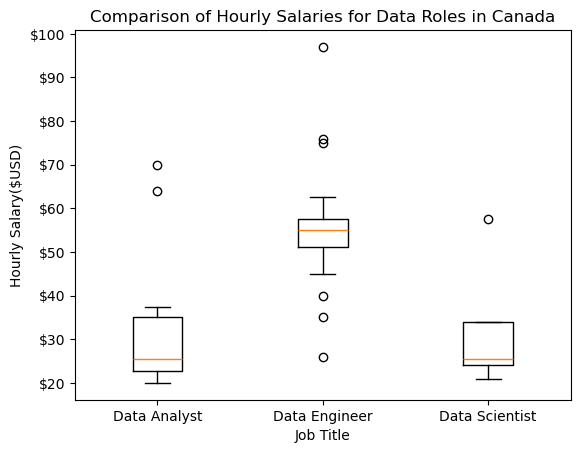

In [46]:
# Distribution of Hourly Salary for Job Postings in Canada
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_CA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].copy()
df_CA = df_CA.dropna(subset=['salary_hour_avg'])

job_list_CA = [df_CA[df_CA['job_title_short'] == job_title]['salary_hour_avg'] for job_title in job_titles]

fig, ax = plt.subplots()
ax.boxplot(job_list_CA, tick_labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary($USD)')
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}' ))
plt.show()